In [1]:
#Code to analyze the images using a Neural Network
#Authors: Savvas Nesseris and Gonzalo Morrás Gutiérrez
#E-mails: savvas.nesseris@csic.es
#         gonzalo.morras@estudiante.uam.es

# Silence annoying TF crap printed on the screen
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]=""  # or even "-1"  

# TensorFlow,  tf.keras and matplotlib stuff
import tensorflow as tf
import matplotlib.pyplot as plt

# Helper libraries
import time
import numpy as np
from numpy import asarray
from os import listdir
from pathlib import Path
import PIL
import PIL.Image
import shutil
import re
import time

In [ ]:
start_runtime = time.time() 

In [2]:
#Hide GPU from visible devices
tf.config.set_visible_devices([], 'GPU')

# To find out which devices your operations and tensors are assigned to
#tf.debugging.set_log_device_placement(True)
print(tf.config.list_physical_devices('CPU'))

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [3]:
def get_images(path, get_SNR = False):

    imgs=list(Path(path).glob('./*.png'))
    images=list()
    if get_SNR: SNR = list()
    
    # Loop over the images  
    for filename in imgs:

        #get the images already normalized
        img_data = asarray(PIL.Image.open(str(filename)))/255.0

        images.append(img_data)

        if get_SNR:
            #get the SNR from the file name 
            #format (Shifted_H1%s%.f_V1%s%.f_%.3f_%.1f.png)%(p/m, |shift_H1|, p/m, |shift_V1|, t_trigger, SNR)
            head, tail = os.path.split(filename)
            SNR.append(float(re.findall("\d+\.\d+", tail)[-1]))

    if get_SNR: return asarray(images), asarray(SNR)
    else: return asarray(images)

In [4]:
# Here it starts   

# These are the names of the classes
# We only have two classes: 0=noise, 1=GW event
class_names = ['0', '1']

#minimum value of the probability to be considered gravitational wave
disc = 0.9

#number of epochs to train NN
epoch_num = 12

#Show the training curves for the validation images
no_train_curves = False

# Set the root path of the data
datapath = 'C:/Users/koich/Desktop/temporary/ReducedSamplesQuantum/'
test_to_exp =  1/18.0

# Set the test paths
test_path_GWs=datapath+'Validation_General_Injected_together/'
test_path_noise=datapath+'Validation_CoincidenceBackground_together/'

# Set the training paths
train_path_GWs=datapath+'General_Injected_together/'
train_path_noise=datapath+'CoincidenceBackground_together/'

# Set the O2 data path
O2_data_path = datapath+'O2_Data_together/'

# Set output path
out_path = 'C:/Users/koich/Desktop/temporary/ReducedSamplesQuantum/Out/'

# load the model or compute it and save it
load_model = False
if load_model:
    model_name = None
else:
    model_name = out_path + 'ResNet_v1.h5'

In [8]:
# Read the GW test images
print('Now reading the GW test images...')
test_images_GWs = get_images(test_path_GWs)
test_labels_GWs = np.repeat(1,len(test_images_GWs))
print(test_images_GWs.shape)

# Read the noise test images
print('Now reading the noise test images...')
test_images_noise = get_images(test_path_noise)
test_labels_noise = np.repeat(0,len(test_images_noise))
print(test_images_noise.shape)

#Merge the two
test_images = np.concatenate((test_images_GWs,test_images_noise))
test_labels = np.concatenate((test_labels_GWs,test_labels_noise))
del test_images_GWs, test_images_noise, test_labels_GWs, test_labels_noise

Now reading the GW test images...
(2108, 150, 50)
Now reading the noise test images...
(2589, 150, 50)


Now reading the GWs train images...
(2398, 150, 50)
Now reading the noise train images...
(2632, 150, 50)
Now starting the training!
Epoch 1/12
158/158 - 360s - loss: 0.1501 - accuracy: 0.9521 - val_loss: 5.2253 - val_accuracy: 0.5512 - 360s/epoch - 2s/step
Epoch 2/12
158/158 - 364s - loss: 0.0841 - accuracy: 0.9753 - val_loss: 4.8970 - val_accuracy: 0.5512 - 364s/epoch - 2s/step
Epoch 3/12
158/158 - 366s - loss: 0.0723 - accuracy: 0.9736 - val_loss: 5.0932 - val_accuracy: 0.5512 - 366s/epoch - 2s/step
Epoch 4/12
158/158 - 355s - loss: 0.0644 - accuracy: 0.9777 - val_loss: 2.9131 - val_accuracy: 0.6304 - 355s/epoch - 2s/step
Epoch 5/12
158/158 - 370s - loss: 0.0652 - accuracy: 0.9795 - val_loss: 0.5706 - val_accuracy: 0.9144 - 370s/epoch - 2s/step
Epoch 6/12
158/158 - 352s - loss: 0.0495 - accuracy: 0.9819 - val_loss: 0.0918 - val_accuracy: 0.9779 - 352s/epoch - 2s/step
Epoch 7/12
158/158 - 363s - loss: 0.0439 - accuracy: 0.9851 - val_loss: 0.2641 - val_accuracy: 0.9023 - 363s/epoch - 

C:\Users\koich\anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


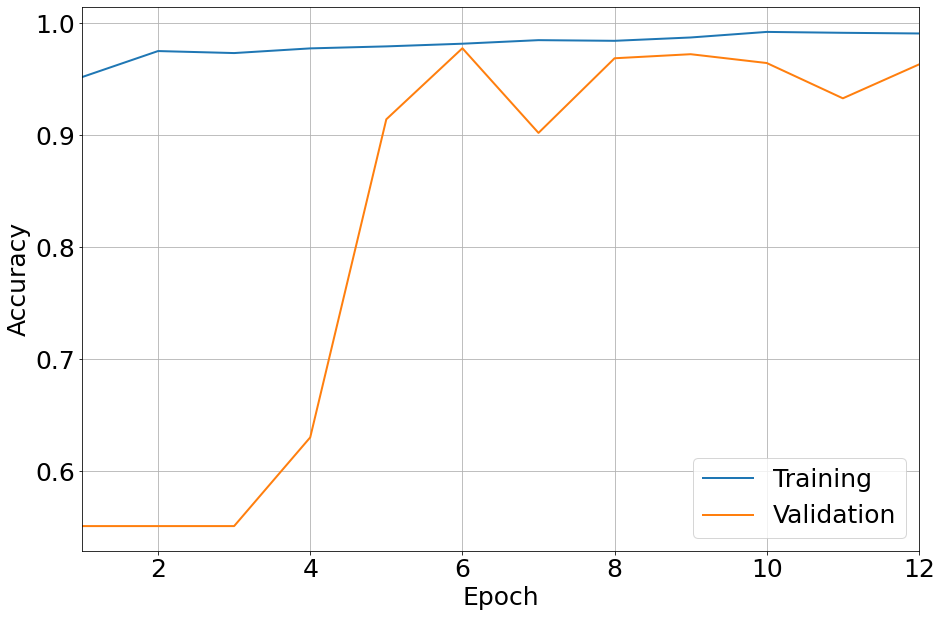

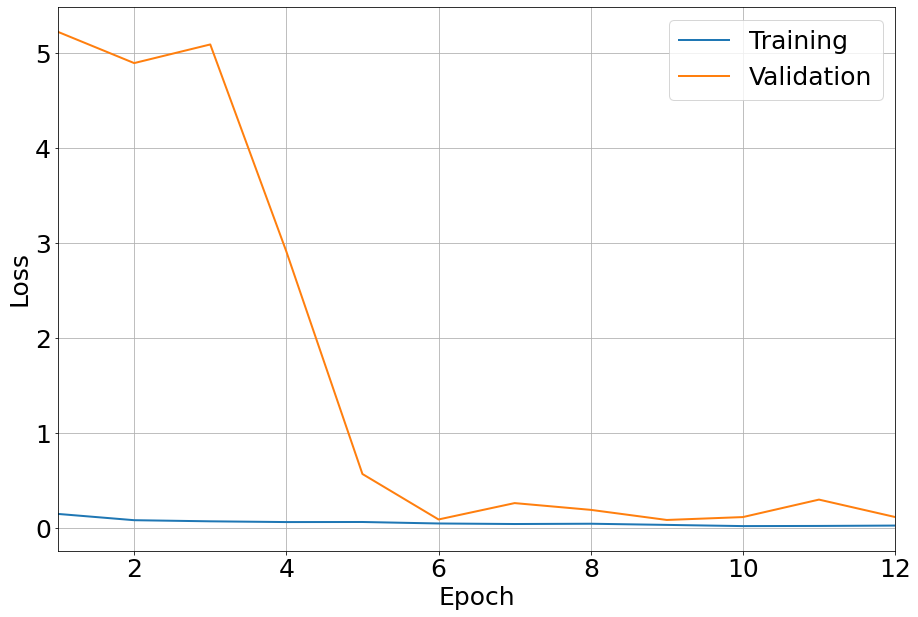

In [6]:
# Set up the model and do the training
if load_model:
    print('Now loading model...')
    model = tf.keras.models.load_model(model_name)
else:
    # Read the GW training images
    print('Now reading the GWs train images...')
    train_images_GWs=get_images(train_path_GWs)
    train_labels_GWs=np.repeat(1,len(train_images_GWs))
    print(train_images_GWs.shape)

    # Read the noise training images
    print('Now reading the noise train images...')
    train_images_noise=get_images(train_path_noise)
    train_labels_noise=np.repeat(0,len(train_images_noise))
    print(train_images_noise.shape)

    #Gather all the train images
    train_images=np.concatenate((train_images_GWs,train_images_noise))

    #Gather all the train labels
    train_labels=np.concatenate((train_labels_GWs,train_labels_noise))

    #liberate unused memory
    del train_images_GWs, train_images_noise, train_labels_GWs, train_labels_noise

    baseModel= tf.keras.applications.ResNet50V2(weights=None, include_top=False, input_shape=(150,50,1), pooling="avg") #v1 v2

    out=baseModel.layers[-1].output 
    output = tf.keras.layers.Dense(1, activation='sigmoid')(out)

    model = tf.keras.models.Model(inputs=baseModel.input, outputs=output)

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy',  metrics=['accuracy'])

    print('Now starting the training!')
    #fit the model
    history = model.fit(train_images, train_labels, epochs=epoch_num, batch_size = 32, verbose=2, validation_data = (test_images, test_labels)) 

    print('Now saving model...')
    model.save(model_name)

    #liberate memory
    del train_images, train_labels, baseModel, out, output

    #generate the plots with the training history

    # summarize history for accuracy
    plt.figure(6,figsize = (15,10))
    plt.rcParams.update({'font.size': 25})
    plt.plot(np.arange(epoch_num)+1, history.history['accuracy'], label = 'Training', linewidth = 2)
    plt.plot(np.arange(epoch_num)+1, history.history['val_accuracy'], label = 'Validation', linewidth = 2)
    plt.ylabel(r'Accuracy')
    plt.xlabel(r'Epoch')
    plt.xlim(1,epoch_num)
    plt.legend()
    plt.grid()
    plt.savefig(out_path + "Accuracy.png", bbox_inches="tight")

    # summarize history for loss
    plt.figure(7,figsize = (15,10))
    plt.rcParams.update({'font.size': 25})
    plt.plot(np.arange(epoch_num) + 1, history.history['loss'], label = 'Training', linewidth = 2)
    plt.plot(np.arange(epoch_num) + 1, history.history['val_loss'], label = 'Validation', linewidth = 2)
    plt.ylabel(r'Loss')
    plt.xlabel(r'Epoch')
    plt.xlim(1,epoch_num)
    plt.legend()
    plt.grid()
    plt.savefig(out_path + "Loss.png", bbox_inches="tight")

    #save training history
    np.savetxt(out_path + "history.txt", np.transpose([history.history['loss'], history.history['val_loss'], history.history['accuracy'], history.history['val_accuracy']]))
    del history


In [9]:
#test validation
test_loss, test_acc = model.evaluate(test_images,test_labels,verbose=0)

print("test_loss = ", test_loss, "        test_acc = ", test_acc)

test_loss =  0.11761989444494247         test_acc =  0.9633808732032776


In [10]:
# Get the probabilities and save the training
predictions = asarray(model.predict(test_images))[:,0]

#Assign the classes
real_vals = asarray(test_labels)
del test_images, test_labels

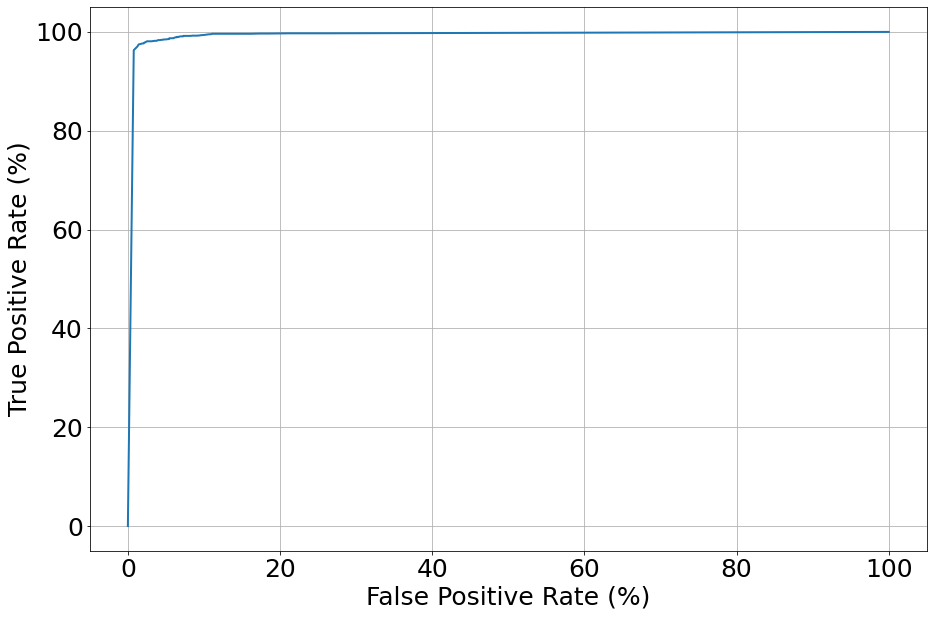

In [11]:
#Generate the ROC curve of the NN
tROC = np.linspace(0,1,101)
false_positive_frac_t = np.array([])
true_positive_frac_t = np.array([])

for t_ROC_c in tROC:

    #Assign predicted class
    predclass_t = np.where(predictions>t_ROC_c, 1, 0)

    #truth table
    true_positives_t = np.sum(np.where(np.logical_and(predclass_t == 1, real_vals == predclass_t), 1, 0))	
    false_positives_t = np.sum(np.where(np.logical_and(predclass_t == 1, real_vals != predclass_t), 1, 0))	
    true_negatives_t = np.sum(np.where(np.logical_and(predclass_t == 0, real_vals == predclass_t), 1, 0))	
    false_negatives_t = np.sum(np.where(np.logical_and(predclass_t == 0, real_vals != predclass_t), 1, 0))

    #accuracy of the neural network
    false_positive_frac_t = np.append(false_positive_frac_t, false_positives_t/(false_positives_t + true_negatives_t))
    true_positive_frac_t = np.append(true_positive_frac_t, true_positives_t/(false_negatives_t + true_positives_t))

#Plot the ROC curve
plt.figure(1,figsize = (15,10))
plt.rcParams.update({'font.size': 25})
plt.plot(100*false_positive_frac_t, 100*true_positive_frac_t, linewidth = 2)
plt.xlabel(r'False Positive Rate (%)')
plt.ylabel(r'True Positive Rate (%)')
plt.grid()
plt.savefig(out_path + "ROC.png", bbox_inches="tight")

In [12]:
#Assign predicted class
predclass = np.where(predictions>disc, 1, 0)

#truth table
true_positives = np.sum(np.where(np.logical_and(predclass == 1, real_vals == predclass), 1, 0))	
false_positives = np.sum(np.where(np.logical_and(predclass == 1, real_vals != predclass), 1, 0))	
true_negatives = np.sum(np.where(np.logical_and(predclass == 0, real_vals == predclass), 1, 0))	
false_negatives = np.sum(np.where(np.logical_and(predclass == 0, real_vals != predclass), 1, 0))
print("\nTrue Positive = %.f      False Positive = %.f"%(true_positives,false_positives))
print("True Negative = %.f      False Negative = %.f"%(true_negatives,false_negatives))

#accuracy of the neural network
false_positive_frac = false_positives/(false_positives + true_negatives)
false_negative_frac = false_negatives/(false_negatives + true_positives)

print("\nfalse_positive_frac = %.4f    false_negative_frac = %.4f\n"%(false_positive_frac, false_negative_frac))


True Positive = 2062      False Positive = 56
True Negative = 2533      False Negative = 46

false_positive_frac = 0.0216    false_negative_frac = 0.0218

